In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/precio/jovenes.csv", index_col = 0)
df[50:150]

,Nombre jugador,Equipo actual,edad,pais,Valoración actual,Progresión,precio,Valoración equipo actual,Mejor valoración,Ataque,Regate,Aceleración,Potencia tiro,Agresividad,Defensa,Portería
50,victor-gomez-perea,malaga-cf,21,Spain,70,80,3400000,69,71,73,66,78,65,65,65,11
51,cole-bassett,feyenoord,19,United States,70,80,3400000,75,72,55,68,71,60,60,60,14
52,giorgi-tsitaishvili,wisla-krakow,20,Georgia,70,82,3800000,65,71,59,80,90,53,29,32,9
53,pol-lozano-vizuete,girona-fc,21,Spain,70,80,3400000,72,72,55,68,74,73,75,65,8
54,james-garner,nottingham-forest,20,England,70,82,3600000,71,71,66,62,68,68,69,64,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,benjamin-sesko,fc-red-bull-salzburg,18,Slovenia,68,82,2800000,73,70,55,68,71,69,62,42,10
146,matteo-cancellieri,hellas-verona,18,Italy,68,82,2800000,75,69,67,74,79,69,55,21,11
147,exequiel-zeballos,boca-juniors,19,Argentina,68,81,2900000,75,69,65,75,83,65,40,27,5
148,destiny-iyenoma-udogie,udinese-calcio,18,Italy,68,81,2700000,74,68,66,71,75,60,68,58,8


In [3]:
df.shape

(418, 16)

In [4]:
df.dtypes

Nombre jugador              object
Equipo actual               object
edad                         int64
pais                        object
Valoración actual            int64
Progresión                   int64
precio                       int64
Valoración equipo actual     int64
Mejor valoración             int64
Ataque                       int64
Regate                       int64
Aceleración                  int64
Potencia tiro                int64
Agresividad                  int64
Defensa                      int64
Portería                     int64
dtype: object

In [5]:
df.isnull().sum()

Nombre jugador              0
Equipo actual               0
edad                        0
pais                        0
Valoración actual           0
Progresión                  0
precio                      0
Valoración equipo actual    0
Mejor valoración            0
Ataque                      0
Regate                      0
Aceleración                 0
Potencia tiro               0
Agresividad                 0
Defensa                     0
Portería                    0
dtype: int64

In [6]:
df.columns

Index(['Nombre jugador', 'Equipo actual', 'edad', 'pais', 'Valoración actual',
       'Progresión', 'precio', 'Valoración equipo actual', 'Mejor valoración',
       'Ataque', 'Regate', 'Aceleración', 'Potencia tiro', 'Agresividad',
       'Defensa', 'Portería'],
      dtype='object')

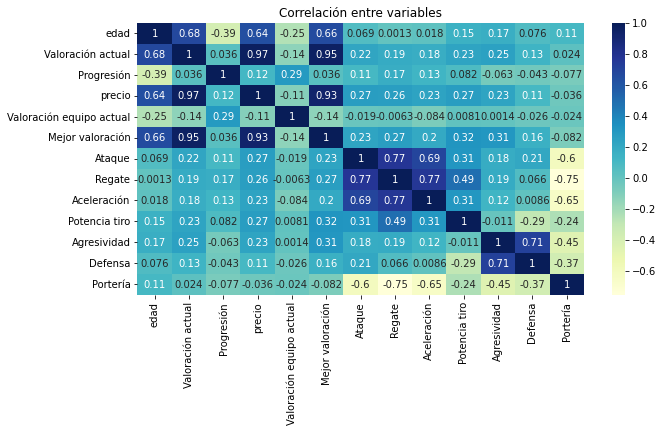

In [7]:
plt.figure(figsize = (10,5))

sns.heatmap(df.corr(),
            cmap = "YlGnBu",
           annot = True)

plt.title('Correlación entre variables');

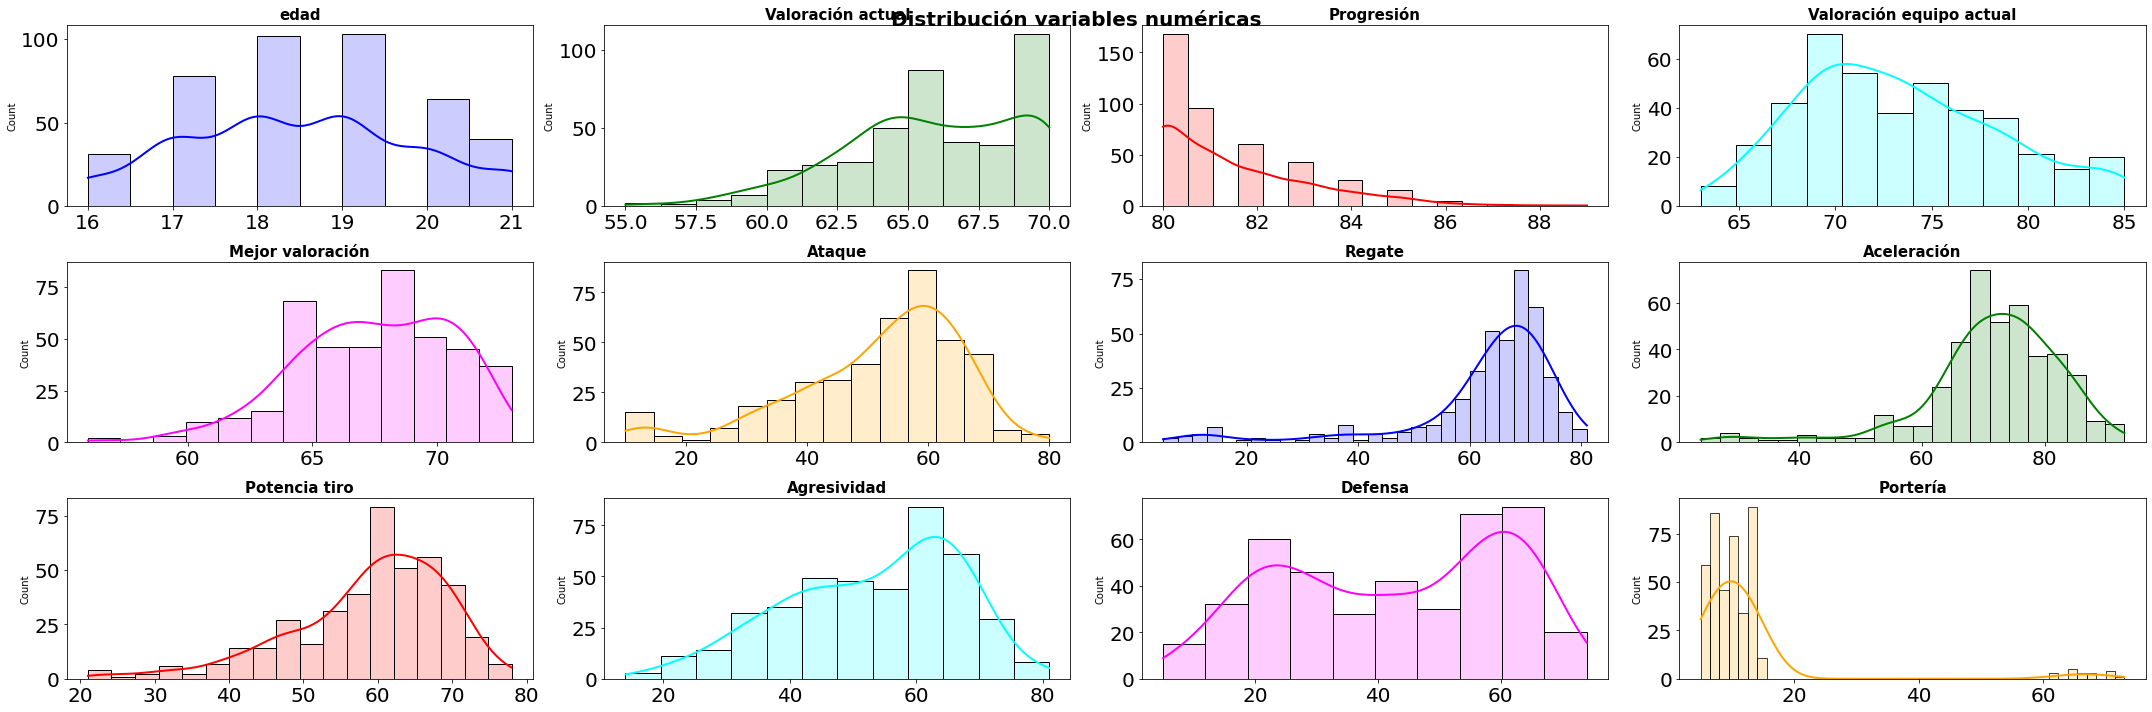

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(30, 10)) 
lista_colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'blue', 'green', 'red', 'cyan', 'magenta', 'orange']
axes = axes.flat

columnas_numeric = df.select_dtypes(include= np.number).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        kde     = True,
        color   = lista_colores[i],
        line_kws= {'linewidth': 2},
        alpha   = 0.2,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
plt.tight_layout()
fig.suptitle('Distribución variables numéricas', fontsize = 20, fontweight = "bold");

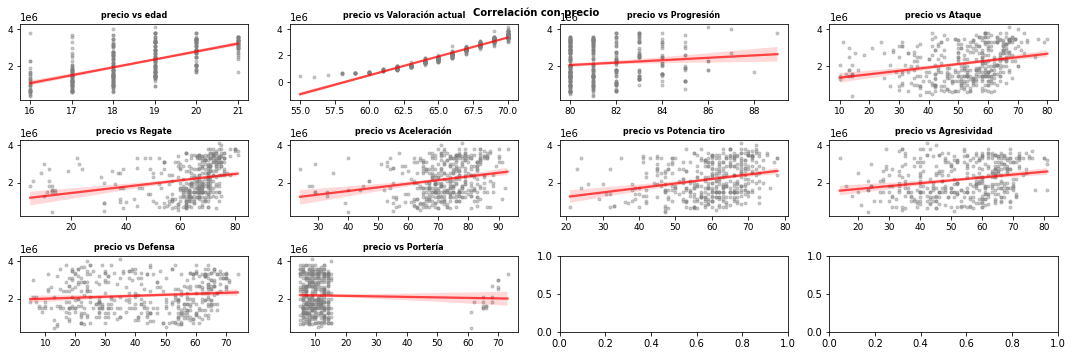

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

axes = axes.flat

columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')


for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout() 
plt.subplots_adjust(top = 0.9) 
plt.tight_layout()
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

In [13]:
df.drop(columns = ['Valoración equipo actual', 'Mejor valoración'], inplace = True)
df.head()

KeyError: "['Valoración equipo actual', 'Mejor valoración'] not found in axis"

In [11]:
df.to_csv('../../data/precio/dflimpio.csv')